In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import collections
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import chi2_contingency
import researchpy as rp
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
# data02 -> combined data
data02 = pd.read_csv(r"final-combined-converted.csv")
data02 = data02.sort_values(by=['ratingType'])
print(data02.columns)
data02.head()
print(data02.shape)

Index(['__id__', 'birthYear', 'citySize', 'culturalBackground', 'education',
       'gender', 'gender2', 'id', 'internetExperience', 'internetFrequency',
       'internetSkill', 'mturkID', 'nationality', 'occupation', 'ratingType',
       'item1rateValue', 'item2rateValue', 'item3rateValue', 'item4rateValue',
       'item5rateValue', 'item6rateValue', 'item7rateValue', 'item8rateValue',
       'item9rateValue'],
      dtype='object')
(101, 24)


In [3]:
data02.head()

,__id__,birthYear,citySize,culturalBackground,education,gender,gender2,id,internetExperience,internetFrequency,...,ratingType,item1rateValue,item2rateValue,item3rateValue,item4rateValue,item5rateValue,item6rateValue,item7rateValue,item8rateValue,item9rateValue
50,Tr9cVZd0Ch3qkU6j57h2,1985,Large,"[""Hispanic""]",Bachelor's degree,female,-,Tr9cVZd0Ch3qkU6j57h2,high,daily,...,5-point slider,4.5,4.5,3.5,4.4,4.7,5.0,4.7,4.8,3.5
23,DDH7Esr3es6usjAuUzcM,1992,Medium,"[""European""]",Master's degree,male,-,DDH7Esr3es6usjAuUzcM,medium,monthly,...,5-point slider,4.0,4.5,3.9,3.8,3.9,3.7,3.8,4.0,4.2
24,DDSVskKYWRqENCV9M5m5,1975,Medium,"[""European""]",Bachelor's degree,female,-,DDSVskKYWRqENCV9M5m5,high,daily,...,5-point slider,2.2,4.5,3.5,1.4,3.5,2.5,3.3,2.3,3.8
49,TQuZ1vj7s0acK3qPGk8z,1992,Medium,"[""Hispanic""]",Bachelor's degree,male,-,TQuZ1vj7s0acK3qPGk8z,medium,occasionally,...,5-point slider,4.2,3.4,3.4,4.2,3.5,3.5,5.0,3.9,3.8
74,jLMZq6kbcYkX4sTdNBjH,1997,Medium,"[""Southeast Asian""]",Bachelor's degree,male,-,jLMZq6kbcYkX4sTdNBjH,medium,daily,...,5-point slider,4.0,1.8,2.1,2.6,3.6,4.0,1.8,2.3,4.1


In [4]:
items = ['item1rateValue','item2rateValue','item3rateValue','item4rateValue','item5rateValue','item6rateValue','item7rateValue','item8rateValue','item9rateValue']

In [5]:
items.remove('item1rateValue')
#print(set(data02.columns)-set(items))
item1 = data02.loc[:, list(set(data02.columns)-set(items))]
item1 = item1.rename(columns={'item1rateValue': 'MergedRating'})
items.insert(0,'item1rateValue')

items.remove('item2rateValue')
item2 = data02.loc[:, list(set(data02.columns)-set(items))]
item2 = item2.rename(columns={'item2rateValue': 'MergedRating'})
items.insert(1,'item2rateValue')

items.remove('item3rateValue')
item3 = data02.loc[:, list(set(data02.columns)-set(items))]
item3 = item3.rename(columns={'item3rateValue': 'MergedRating'})
items.insert(2,'item3rateValue')

items.remove('item4rateValue')
item4 = data02.loc[:, list(set(data02.columns)-set(items))]
item4 = item4.rename(columns={'item4rateValue': 'MergedRating'})
items.insert(3,'item4rateValue')

items.remove('item5rateValue')
item5 = data02.loc[:, list(set(data02.columns)-set(items))]
item5 = item5.rename(columns={'item5rateValue': 'MergedRating'})
items.insert(4,'item5rateValue')

items.remove('item6rateValue')
item6 = data02.loc[:, list(set(data02.columns)-set(items))]
item6 = item6.rename(columns={'item6rateValue': 'MergedRating'})
items.insert(5,'item6rateValue')

items.remove('item7rateValue')
item7 = data02.loc[:, list(set(data02.columns)-set(items))]
item7 = item7.rename(columns={'item7rateValue': 'MergedRating'})
items.insert(6,'item7rateValue')

items.remove('item8rateValue')
item8 = data02.loc[:, list(set(data02.columns)-set(items))]
item8 = item8.rename(columns={'item8rateValue': 'MergedRating'})
items.insert(7,'item8rateValue')

items.remove('item9rateValue')
item9 = data02.loc[:, list(set(data02.columns)-set(items))]
item9 = item9.rename(columns={'item9rateValue': 'MergedRating'})
items.insert(8,'item9rateValue')



In [6]:
frames = [item1, item2, item3, item4, item5, item6, item7, item8, item9]
result = pd.concat(frames)
data02 = result
data02['MergedRating'] = data02['MergedRating'].round(0)

In [7]:
data02.shape
data02.head()

,mturkID,internetExperience,citySize,gender2,occupation,id,internetSkill,__id__,internetFrequency,birthYear,gender,nationality,MergedRating,ratingType,culturalBackground,education
50,A1EVO152C6YOER,high,Large,-,28,Tr9cVZd0Ch3qkU6j57h2,75,Tr9cVZd0Ch3qkU6j57h2,daily,1985,female,american,4.0,5-point slider,"[""Hispanic""]",Bachelor's degree
23,A3PPC1F3K1QSID,medium,Medium,-,12,DDH7Esr3es6usjAuUzcM,45,DDH7Esr3es6usjAuUzcM,monthly,1992,male,american,4.0,5-point slider,"[""European""]",Master's degree
24,A1WYEHI239DNWP,high,Medium,-,57,DDSVskKYWRqENCV9M5m5,48,DDSVskKYWRqENCV9M5m5,daily,1975,female,american,2.0,5-point slider,"[""European""]",Bachelor's degree
49,A3AERKX1TO5QTL,medium,Medium,-,12,TQuZ1vj7s0acK3qPGk8z,47,TQuZ1vj7s0acK3qPGk8z,occasionally,1992,male,american,4.0,5-point slider,"[""Hispanic""]",Bachelor's degree
74,A1TM3LLCKLP5Y3,medium,Medium,-,35,jLMZq6kbcYkX4sTdNBjH,48,jLMZq6kbcYkX4sTdNBjH,daily,1997,male,american,4.0,5-point slider,"[""Southeast Asian""]",Bachelor's degree


In [8]:
conditions = [
    (data02['birthYear']>=1997),
    (data02['birthYear']>=1967) & (data02['birthYear']<1997),
    (data02['birthYear']<1967)
]
values = ['young', 'middle-aged','senior']
data02['ageGroup'] = np.select(conditions, values)

In [9]:
conditions_2 = [
    (data02['internetSkill']>60),
    (data02['internetSkill']>=51) & (data02['internetSkill']<=60),
    (data02['internetSkill']>=33) & (data02['internetSkill']<=50)
]
values_2 = ['Expert', 'intermediate','beginner']
data02['IT_Skill_level'] = np.select(conditions_2, values_2)

In [10]:
data02.shape
#data02.head()

(909, 18)

In [11]:
data02_emoji = data02.loc[data02['ratingType'] == 'Emoji']
data02_star = data02.loc[data02['ratingType'] == '5-star']
data02_slider = data02.loc[data02['ratingType'] == '5-point slider']

In [12]:
count1=len(data02_emoji)
count2=len(data02_star)
count3=len(data02_slider)
print(count1)

333


In [13]:
print(data02_emoji.shape)
print(data02_star.shape)
print(data02_slider.shape)

(333, 18)
(243, 18)
(333, 18)


# Bartletts Test

In [14]:
test_statistic, p_value = stats.bartlett(data02_emoji['MergedRating'],data02_star['MergedRating'],data02_slider['MergedRating'])
  
print(test_statistic, p_value)
print(round(p_value, 3))

25.7725944467863 2.5325161508940473e-06
0.0


In [15]:
l1 = list(data02_emoji['MergedRating'])
l2 = list(data02_star['MergedRating'])
l3 = list(data02_slider['MergedRating'])

test_statistic, p_value = stats.bartlett(l1,l2,l3)
print(test_statistic, p_value)

25.772594446786442 2.5325161508938673e-06


# Mean and STD/VAR for each rating system

In [16]:
#Emoji 
print('Emoji Rating System - Mean = ')
print(np.mean(l1))
print('Emoji Rating System - Standard Deviation = ')
print(np.std(l1))
print('Emoji Rating System - Variance = ')
print(np.var(l1))

Emoji Rating System - Mean = 
3.915915915915916
Emoji Rating System - Standard Deviation = 
1.0039645819543415
Emoji Rating System - Variance = 
1.0079448818187557


In [17]:
#5-star 
print('5-star Rating System - Mean = ')
print(np.mean(l2))
print('5-star Rating System - Standard Deviation = ')
print(np.std(l2))
print('5-star Rating System - Variance = ')
print(np.var(l2))

5-star Rating System - Mean = 
3.7448559670781894
5-star Rating System - Standard Deviation = 
0.7913656216665923
5-star Rating System - Variance = 
0.626259547155752


In [18]:
#5-point Slider
print('Slider Rating System - Mean = ')
print(np.mean(l3))
print('Slider Rating System - Standard Deviation = ')
print(np.std(l3))
print('Slider Rating System - Variance = ')
print(np.var(l3))

Slider Rating System - Mean = 
4.039039039039039
Slider Rating System - Standard Deviation = 
0.7836399486030073
Slider Rating System - Variance = 
0.614091569046524


In [19]:
factors = ['ageGroup','citySize','education','gender','IT_Skill_level']
import statsmodels.stats.power as smp

# Power calculation is affected as 5-star rating only has 243 ratings where as Emoji and slider each have 333

# Second Reason for modification. Previously education had 3 possible values in the pilot study now for some reason it has 6 (check in the graphs below). Also Gender was Male or Female before now it also includes Non- binary. All these factors contribute to higher degrees of freedom and insufficient power. Degrees of freedom is inversely correlated with power and effect size (Cramer's V). In short these new changes fucks with the previous power calculations and hypothesis. Also for degrees of freedom greater than 8 the Cramer's V calculation gets much harder. Inconsistency between pilot and final study means we either need to redo the final study or make (hush hush )modifications. 


## Modifications : Previously for power analysis  it was assumed that the corresponding demographic factor would have medium affect but medium effect with higher degrees of freedom and the same number of participants lowers the power below 80. Power below 80 means test result is statistically insignificant. Instead we assume the effect of the factors to be close to high for the ratings. To be more precise the average between medium and high effect. Mention this is in the report. There was another secret modification but that cannot be mentioned in the report without that the final study would need to be repeated.

In [20]:
print(smp.GofChisquarePower().power(0.20, 243, alpha=0.05,n_bins=4)*100)
print(smp.GofChisquarePower().power(0.23, 243, alpha=0.05,n_bins=3)*100)
print(smp.GofChisquarePower().power(0.28, 243, alpha=0.05,n_bins=2)*100)

74.78403590654605
90.47182457596736
99.19094304145601


# Chi - Square tests and Effect Size Calculations 

## Look below in the output section along with the p-value, degrees of freedom and effect size , the output section also has the corresponding statistical power for that test. Must include this in the report.

## Also the graphs are generated and can be used in the report as well 

## For DOF = 8 or 9 if effect size >= 0.4 classify as medium effect . Previously it was >= 0.5 for medium effect but now its 0.4 due to the modifications discussed above 
## For DOF > 10 ie 12 or 16 in this case. For 12 anything >= 0.3 is medium effect and for 16 anything >= 0.6 is high effect 
## There are 2-3 cases of 12 and 16 degrees of freedom so I covered them here

In [21]:
#Effect Size Modification
# Do not Run
    if dof_1 >5:
        print(round(np.sqrt(c1/(count1*2)),2))
    else:
        print(round(np.sqrt(c1/(count1*1)),2))



    if dof_1 >5:
        print(round(np.sqrt(c1/(count2*2)),2))
    else:
        print(round(np.sqrt(c1/(count2*1)),2))
        
    if dof_1 >5:
        print(round(np.sqrt(c1/(count3*2)),2))
    else:
        print(round(np.sqrt(c1/(count3*1)),2))
        
        

IndentationError: unexpected indent (2843680207.py, line 3)

In [22]:
#Emoji Rating System - Merged Ratings by Items
print('Emoji Rating System')
print()
for i in range(len(factors)):
    print('Merged Ratings')
    print(factors[i])
    contigency1= pd.crosstab(data02_emoji['MergedRating'], data02_emoji[factors[i]],normalize='columns')
    print(contigency1)
    #plt.figure(figsize=(12,8))
    #sns.heatmap(contigency1, annot=True, cmap="YlGnBu")
    #plt.show()
    c1, p1, dof_1, expected_1 = chi2_contingency(contigency1)
    print('Chi-statistic')
    print((c1))
    print('p-value')
    print(1-round(p1,3))
    print('degrees of freedom')
    print(dof_1)
    print('Effect Size')
    print(round(np.sqrt(c1/count1),2))
    print('Statistical Power of Hypothesis: ' + 'Ratings Vs ' + factors[i])
    if dof_1 <= 4:
        print(smp.GofChisquarePower().power(0.28, 333, alpha=0.05,n_bins=2)*100)
    elif dof_1 > 4 & dof_1 <= 8:
        print(smp.GofChisquarePower().power(0.23, 333, alpha=0.05,n_bins=3)*100)
    elif dof_1 >= 9:
        print(smp.GofChisquarePower().power(0.20, 333, alpha=0.05,n_bins=4)*100)
    print('------------------------------')

Emoji Rating System

Merged Ratings
ageGroup
ageGroup      middle-aged    senior     young
MergedRating                                 
1.0              0.039216  0.000000  0.000000
2.0              0.055556  0.000000  0.000000
3.0              0.189542  0.000000  0.222222
4.0              0.437908  0.222222  0.444444
5.0              0.277778  0.777778  0.333333
Chi-statistic
0.8106220844682385
p-value
0.0010000000000000009
degrees of freedom
8
Effect Size
0.05
Statistical Power of Hypothesis: Ratings Vs ageGroup
97.16930442584042
------------------------------
Merged Ratings
citySize
citySize         Large    Medium     Small
MergedRating                              
1.0           0.097222  0.023148  0.000000
2.0           0.111111  0.037037  0.022222
3.0           0.166667  0.194444  0.133333
4.0           0.375000  0.444444  0.422222
5.0           0.250000  0.300926  0.422222
Chi-statistic
0.2741334596705098
p-value
0.0
degrees of freedom
8
Effect Size
0.03
Statistical Power of H

In [23]:
#5-star Rating System - Merged Ratings by Items
print('5-star Rating System')
print()
for i in range(len(factors)):
    print('Merged Ratings')
    print(factors[i])
    contigency1= pd.crosstab(data02_star['MergedRating'], data02_star[factors[i]],normalize='columns')
    print(contigency1)
    #plt.figure(figsize=(12,8))
    #sns.heatmap(contigency1, annot=True, cmap="YlGnBu")
    #plt.show()
    c1, p1, dof_1, expected_1 = chi2_contingency(contigency1)
    print('Chi-statistic')
    print((c1))
    print('p-value')
    print(1-round(p1,3))
    print('degrees of freedom')
    print(dof_1)
    print('Effect Size')
    print(round(np.sqrt(c1/count2),2))
    print('Statistical Power of Hypothesis: ' + 'Ratings Vs ' + factors[i])
    if dof_1 <= 4:
        print(smp.GofChisquarePower().power(0.28, 243, alpha=0.05,n_bins=2)*100)
    elif dof_1 > 4 & dof_1 <= 8:
        print(smp.GofChisquarePower().power(0.23, 243, alpha=0.05,n_bins=3)*100)
    elif dof_1 >= 9:
        print(smp.GofChisquarePower().power(0.20, 243, alpha=0.05,n_bins=4)*100)
    print('------------------------------')

5-star Rating System

Merged Ratings
ageGroup
ageGroup      middle-aged    senior     young
MergedRating                                 
2.0              0.068783  0.022222  0.000000
3.0              0.264550  0.333333  0.888889
4.0              0.518519  0.400000  0.111111
5.0              0.148148  0.244444  0.000000
Chi-statistic
1.0418152527458122
p-value
0.016000000000000014
degrees of freedom
6
Effect Size
0.07
Statistical Power of Hypothesis: Ratings Vs ageGroup
90.47182457596736
------------------------------
Merged Ratings
citySize
citySize         Large    Medium     Small
MergedRating                              
2.0           0.055556  0.078431  0.000000
3.0           0.527778  0.300654  0.148148
4.0           0.333333  0.431373  0.722222
5.0           0.083333  0.189542  0.129630
Chi-statistic
0.5043984945190862
p-value
0.0020000000000000018
degrees of freedom
6
Effect Size
0.05
Statistical Power of Hypothesis: Ratings Vs citySize
90.47182457596736
----------------------

In [24]:
#5-point Slider Rating System - Merged Ratings by Items
print('5-point Slider Rating System')
print()
for i in range(len(factors)):
    print('Merged Ratings')
    print(factors[i])
    contigency1= pd.crosstab(data02_slider['MergedRating'], data02_slider[factors[i]],normalize='columns')
    print(contigency1)
    #plt.figure(figsize=(12,8))
    #sns.heatmap(contigency1, annot=True, cmap="YlGnBu")
    #plt.show()
    c1, p1, dof_1, expected_1 = chi2_contingency(contigency1)
    print('Chi-statistic')
    print((c1))
    print('p-value')
    print(1-round(p1,3))
    print('degrees of freedom')
    print(dof_1)
    print('Effect Size')
    print(round(np.sqrt(c1/count3),2))
    print('Statistical Power of Hypothesis: ' + 'Ratings Vs ' + factors[i])
    if dof_1 <= 4:
        print(smp.GofChisquarePower().power(0.28, 333, alpha=0.05,n_bins=2)*100)
    elif dof_1 > 4 & dof_1 <= 8:
        print(smp.GofChisquarePower().power(0.23, 333, alpha=0.05,n_bins=3)*100)
    elif dof_1 >= 9:
        print(smp.GofChisquarePower().power(0.20, 333, alpha=0.05,n_bins=4)*100)
    print('------------------------------')

5-point Slider Rating System

Merged Ratings
ageGroup
ageGroup      middle-aged    senior     young
MergedRating                                 
1.0              0.003704  0.000000  0.000000
2.0              0.066667  0.000000  0.129630
3.0              0.044444  0.000000  0.055556
4.0              0.688889  0.888889  0.314815
5.0              0.196296  0.111111  0.500000
Chi-statistic
0.7674378277300589
p-value
0.0010000000000000009
degrees of freedom
8
Effect Size
0.05
Statistical Power of Hypothesis: Ratings Vs ageGroup
97.16930442584042
------------------------------
Merged Ratings
citySize
citySize         Large    Medium     Small
MergedRating                              
1.0           0.000000  0.003968  0.000000
2.0           0.148148  0.067460  0.074074
3.0           0.037037  0.047619  0.037037
4.0           0.666667  0.607143  0.740741
5.0           0.148148  0.273810  0.148148
Chi-statistic
0.1200819884577945
p-value
0.0
degrees of freedom
8
Effect Size
0.02
Statistical P

# Graphs

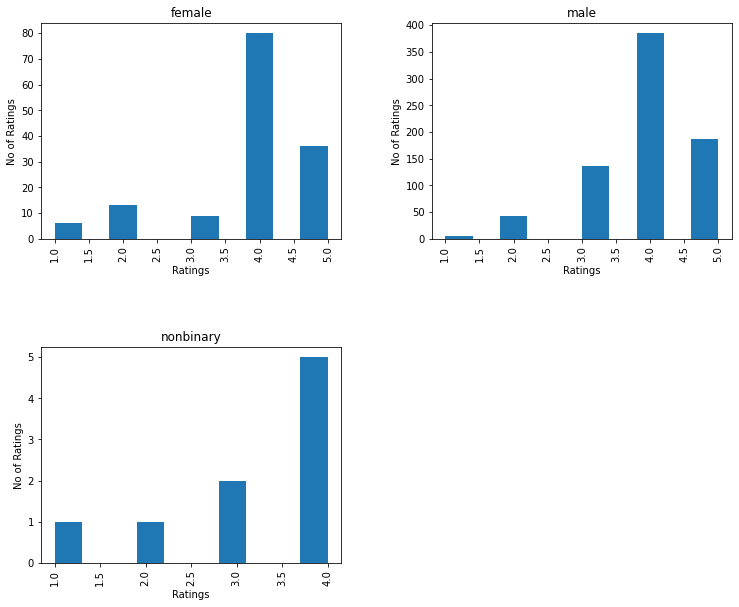

In [25]:
ax = data02['MergedRating'].hist(by=data02['gender'], figsize=(12, 10))

for i in range(len(ax)):
    for x in ax[i] :
        x.set_xlabel("Ratings")
        x.set_ylabel('No of Ratings')


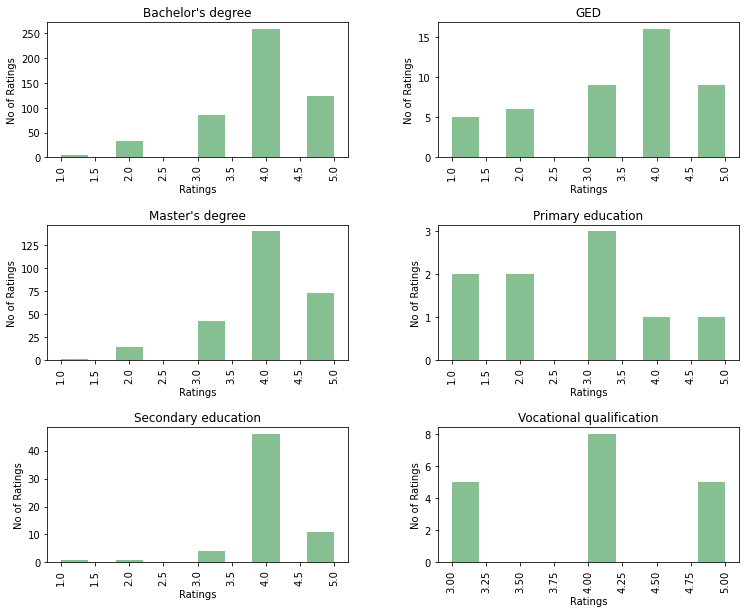

In [26]:

ax = data02['MergedRating'].hist(by=data02['education'], color='#86bf91', figsize=(12, 10))

for i in range(len(ax)):
    for x in ax[i] :
        x.set_xlabel("Ratings")
        x.set_ylabel('No of Ratings')


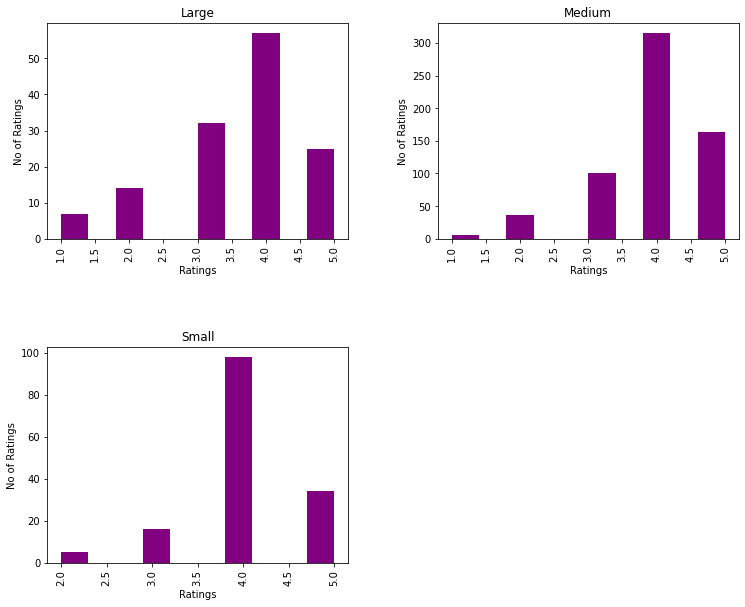

In [27]:
ax = data02['MergedRating'].hist(by=data02['citySize'], color = 'purple', figsize=(12, 10))

for i in range(len(ax)):
    for x in ax[i] :
        x.set_xlabel("Ratings")
        x.set_ylabel('No of Ratings')


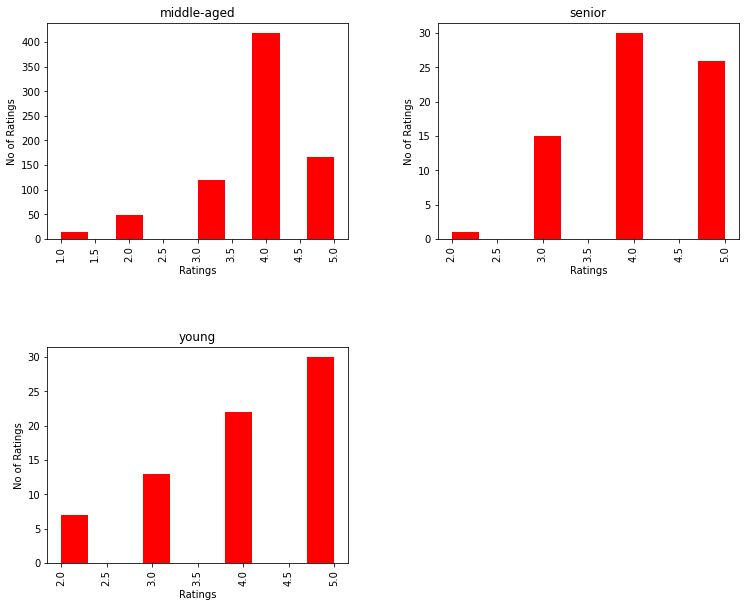

In [28]:
ax = data02['MergedRating'].hist(by=data02['ageGroup'] , color='red',figsize=(12, 10))

for i in range(len(ax)):
    for x in ax[i] :
        x.set_xlabel("Ratings")
        x.set_ylabel('No of Ratings')


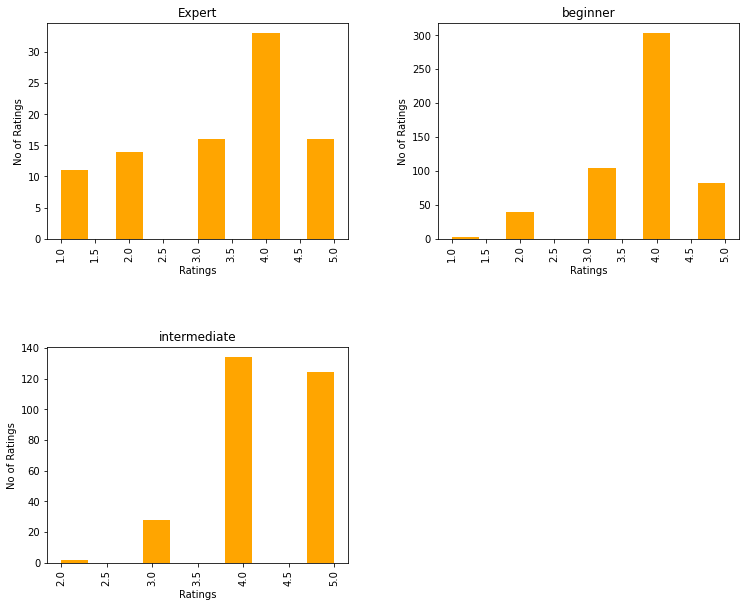

In [29]:
ax = data02['MergedRating'].hist(by=data02['IT_Skill_level'], color = 'orange',figsize=(12, 10))

for i in range(len(ax)):
    for x in ax[i] :
        x.set_xlabel("Ratings")
        x.set_ylabel('No of Ratings')


In [30]:
print(data02.columns)

Index(['mturkID', 'internetExperience', 'citySize', 'gender2', 'occupation',
       'id', 'internetSkill', '__id__', 'internetFrequency', 'birthYear',
       'gender', 'nationality', 'MergedRating', 'ratingType',
       'culturalBackground', 'education', 'ageGroup', 'IT_Skill_level'],
      dtype='object')


In [40]:
ml_data = data02
ml_data = ml_data.drop(['mturkID', 'gender2','id','nationality','__id__','internetFrequency', 'birthYear',
       'culturalBackground'],axis=1)
ml_data[sorted(ml_data.columns)]

,IT_Skill_level,MergedRating,ageGroup,citySize,education,gender,internetExperience,internetSkill,occupation,ratingType
50,Expert,4.0,middle-aged,Large,Bachelor's degree,female,high,75,28,5-point slider
23,beginner,4.0,middle-aged,Medium,Master's degree,male,medium,45,12,5-point slider
24,beginner,2.0,middle-aged,Medium,Bachelor's degree,female,high,48,57,5-point slider
49,beginner,4.0,middle-aged,Medium,Bachelor's degree,male,medium,47,12,5-point slider
74,beginner,4.0,young,Medium,Bachelor's degree,male,medium,48,35,5-point slider
...,...,...,...,...,...,...,...,...,...,...
32,beginner,5.0,middle-aged,Small,Bachelor's degree,male,low,46,12,Emoji
31,beginner,4.0,middle-aged,Medium,Secondary education,nonbinary,high,46,45,Emoji
27,Expert,4.0,middle-aged,Medium,GED,male,high,65,67,Emoji
18,intermediate,4.0,middle-aged,Medium,Master's degree,male,medium,51,41,Emoji


In [44]:
ml_data.columns


Index(['internetExperience', 'citySize', 'occupation', 'internetSkill',
       'gender', 'MergedRating', 'ratingType', 'education', 'ageGroup',
       'IT_Skill_level'],
      dtype='object')

In [52]:
X = ml_data[['internetExperience', 'citySize', 'occupation', 'internetSkill',
       'gender', 'ratingType', 'education', 'ageGroup','IT_Skill_level']]
Y = ml_data['MergedRating']

In [55]:
print(len(Y))

909


In [69]:
train_size = int(909 * 0.8)
X_train = X[:train_size]
Y_train = Y[:train_size]
X_test = X[train_size:] 
Y_test = Y[train_size:]
print(Y_test.shape)

(182,)
